# 2. Images – representation, grayscale and color, color spaces

In [16]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random

def show_image(image):
    plt.figure()
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

### **a)** Create a grayscale image, having $100$ (lines) x $200$ (columns) pixels with constant intensity, 100.<br>Draw the two diagonals of the image with intensity $255$. Display the image.

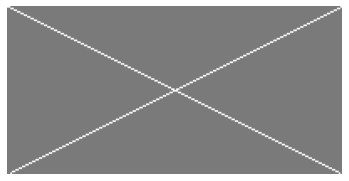

In [17]:
image = np.ones((100, 200, 3), np.uint8) * 122

cv2.line(image, (0, 0), (200, 100), (255, 255, 255), 1)
cv2.line(image, (200, 0), (0, 100), (255, 255, 255), 1)

show_image(image)

### **b)** Create a color image, having $100$ (lines) x $200$ (columns) pixels with yellow color, 100.<br>Draw the two diagonals of the image, one in red color, the other in blue color. Display the image.

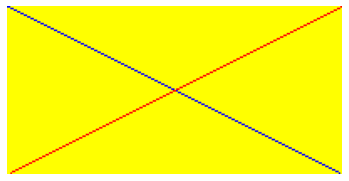

In [18]:
image = np.ones((100, 200, 3), np.uint8)
image[:] = (0, 255, 255)

cv2.line(image, (0, 0), (200, 100), (255, 0, 0), 1)
cv2.line(image, (200, 0), (0, 100), (0, 0, 255), 1)

show_image(image)

### **c)** Read a color image, display it in one window, convert it to grayscale, display the grayscale image in another window and save the grayscale image to a different file.

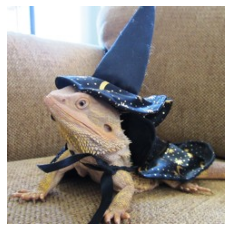

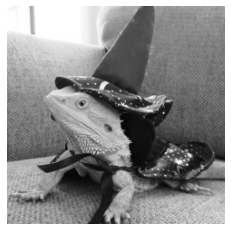

In [21]:
filename = "Images/lizard.jpg"

image = cv2.imread(filename, 1)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

show_image(image)
show_image(gray)

### **d)** Read an image (color or grayscale) and add "salt and pepper" noise to it. The number of noisy points must be 10% of the total number of image points.

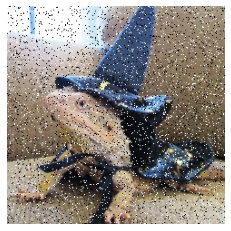

In [20]:
def salt_and_pepper(image, prob):
    output = np.zeros(image.shape, np.uint8)
    threshold = 1 - prob 

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()

            if rdn < prob:
                output[i][j] = 0
            
            elif rdn > threshold:
                output[i][j] = 255
            
            else:
                output[i][j] = image[i][j]

    return output

image_with_noise= salt_and_pepper(image, 0.05)

show_image(image_with_noise)

### **e)** Read a color image, in RGB format, split the 3 channels and show each channel in a separate window. Add a constant value to one of the channels, merge the channels into a new color image and show the resulting image.

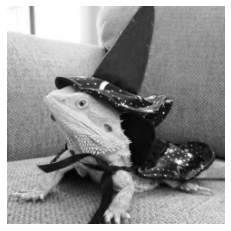

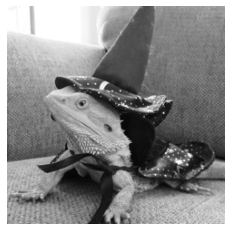

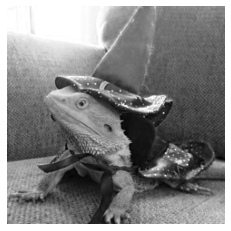

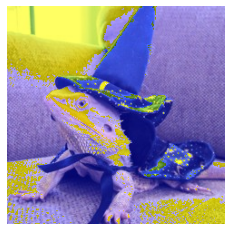

In [22]:
b, g, r = cv2.split(image)

show_image(r)
show_image(g)
show_image(b)

b += 100

merged = cv2.merge((b, g, r))

show_image(merged)

### **f)** Read a color image, in RGB format, convert it to HSV, split the 3 HSV channels and show each channel in a separate window. Add a constant value to saturation channel, merge the channels into a new color image and show the resulting image.

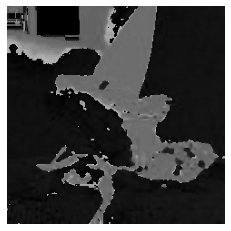

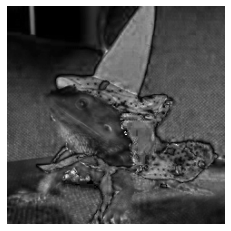

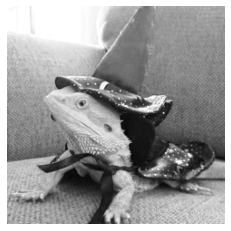

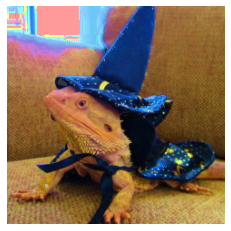

In [23]:
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv)

show_image(h)
show_image(s)
show_image(v)

cv2.imwrite("Images/6-1.bmp", h)
cv2.imwrite("Images/6-2.bmp", s)
cv2.imwrite("Images/6-3.bmp", v)

s += 100

merged = cv2.cvtColor(cv2.merge((h, s, v)), cv2.COLOR_HSV2BGR)

show_image(merged)